In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
np.random.seed(42)

data = {
    'Gender': np.random.choice(['Male','Female'], 50),
    'SeniorCitizen': np.random.choice([0,1], 50),
    'Tenure': np.random.randint(1, 72, 50),
    'MonthlyCharges': np.random.randint(20, 120, 50),
    'TotalCharges': np.random.randint(100, 8000, 50),
    'Churn': np.random.choice(['Yes','No'], 50, p=[0.3, 0.7])
}

df = pd.DataFrame(data)

In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Churn'] = le.fit_transform(df['Churn'])  # 1 = Yes, 0 = No

X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.6


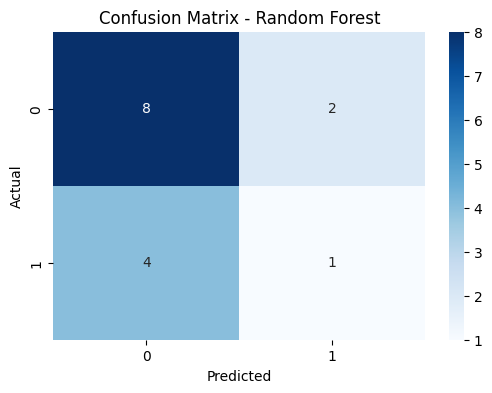

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


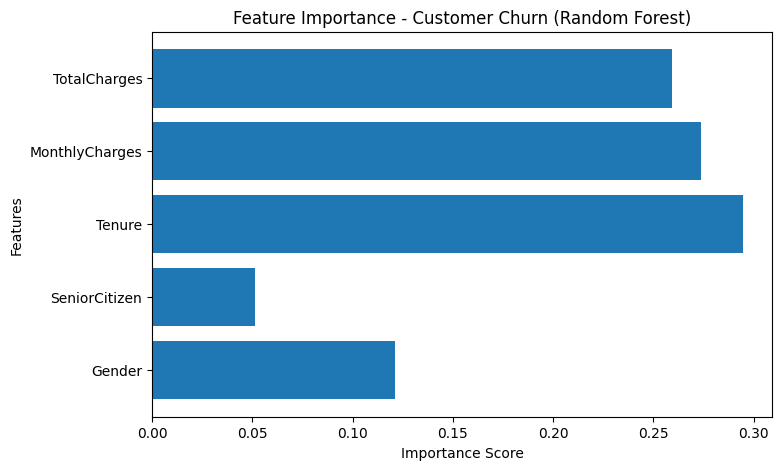

In [ ]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Customer Churn (Random Forest)")
plt.show()